In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r"C:\\Users\\Admin\\Desktop\\ineuron\\_FSDSM_SelfLearned_RashmiKumari\\MACHINE_LEARNING\\01.End_to_End_setup_and_MLproject\\02.Implementation_Of_EDA&FE_in_JupyterNB\\notebooks\\data\\gemstone.csv")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.drop("id",axis=1,inplace=True)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Creating model:

1. We need independent and dependent features in X and y form.
2. Here we need to segregate the data.
3. Then we will split the X and y in training and testing data.
   for that we need to use train_test_split method 
4.. Then fit the model on the train data and predict the target feature.


In [6]:
X=data.drop("price",axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [7]:
y=data[["price"]]
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [8]:
# Segregate the data...

cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(exclude='object').columns


In [9]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [10]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [11]:
# Define The custom ranking for each ordinal variable..
# Ascending....

cut_categories=["Fair","Good","Very Good","Premium","Ideal"]
color_categories=["J","I","H","G","F","E","D"]
clarity_categories=["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [12]:
# Now here we will not manully do the oridal edncoding but we will use pipeline...

In [13]:
import sklearn
print(sklearn.__version__)


1.1.3


In [14]:
from sklearn.impute import  SimpleImputer

In [15]:
# Feature Engineering 
from sklearn.impute import SimpleImputer  # For Handling the missing values.
from sklearn.preprocessing import StandardScaler # Handling the Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding , because sklearn needs numbers to perform on


# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



If we are working on the some project where multiple feature engineering is required then no need to write down each and every step individually/separately.....Everything we can keep inside the Pipeline Object and in a single shot we can transform our data....

In [16]:
num_pipeline=Pipeline(
    steps=[
        ("Imputer",SimpleImputer()),  #we dont have missing value here but we are just making pipeline..
        ("Scaler",StandardScaler())   
    ]

)

In [17]:
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='most_frequent')),
        ("encoding",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
        
        # Order will be from 0 ,1,2,3.....categories=[cut_categories,color_categories,clarity_categories] so be careful while arranging the data.
        # After encoding we can do scaling we can do it wont harm the result...for now we are skipping it.  
    ])


In [18]:
# Now, we need to transform our data...using ColumnTransfomer()


# Create a column transformer with different preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    
    [("Numerical_pipeline",num_pipeline,num_cols), # (Name,Name of pipleine , column on which this pipeline need to be performed.)
     ("Categorical_pipeline",cat_pipeline,cat_cols)    
    ]
)

Pipeline helps organize and execute a sequence of data processing and modeling steps, while ColumnTransformer facilitates the application of different transformations to specific subsets of features in the dataset. These tools contribute to more efficient and modular machine learning workflows.

----------------------------------------------

Now After Preprocessing on the Data ...we will split the data...Why?
Because: If we dont split the data and we perform the steps on entire data... no testing data is there...then it will do data leakage..


So , to avoid the data leakage we do train test split...so that we will get the training data and validation data also on the basis of the we came to know our prediction is correct or not...


![Screenshot 2023-12-19 134001.png](<attachment:Screenshot 2023-12-19 134001.png>)
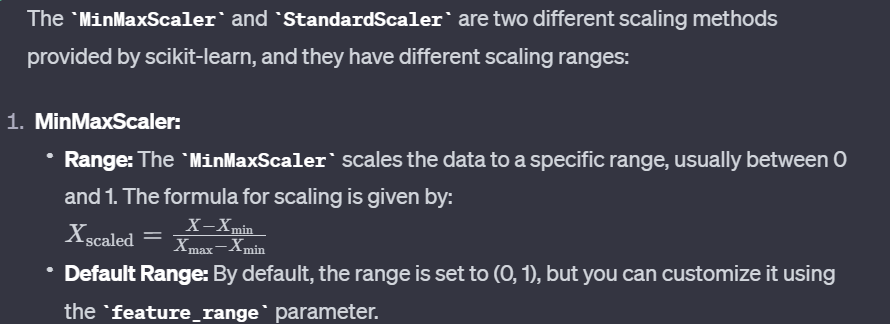

![Screenshot 2023-12-19 134021.png](<attachment:Screenshot 2023-12-19 134021.png>)
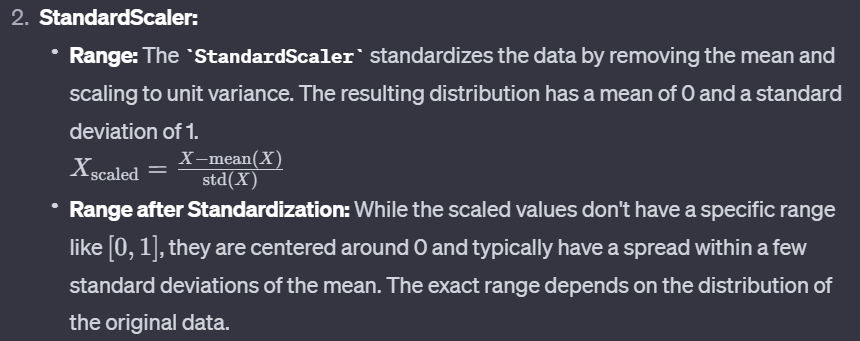

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [20]:
X_train.shape

(135501, 9)

In [21]:
y_train.shape

(135501, 1)

In [22]:
X_test.shape

(58072, 9)

In [23]:
y_test.shape

(58072, 1)

In [24]:
print("Number of elements in the training set:",X_train.shape[0],"\nNumber of Independent Features:",X_train.shape[1])
print("Number of elements in the training set:",y_train.shape[0],"\nNumber of dependent Features:",y_train.shape[1])

print("________________________________________________")

print("Number of elements in the testing set:",X_test.shape[0],"\nNumber of Independent Features:",X_test.shape[1])
print("Number of elements in the testing set:",y_test.shape[0],"\nNumber of dependent Features:",y_test.shape[1])


Number of elements in the training set: 135501 
Number of Independent Features: 9
Number of elements in the training set: 135501 
Number of dependent Features: 1
________________________________________________
Number of elements in the testing set: 58072 
Number of Independent Features: 9
Number of elements in the testing set: 58072 
Number of dependent Features: 1


--------------------------------------

If wee want to transform the data....it have certain function....fit_transform()


* Training Phase: fit_transform() - Learn parameters from the training data and transform it.
* Testing Phase: transform() - Use the learned parameters to transform the testing data.


This approach ensures that the scaling or encoding is consistent between the training and testing datasets, which is crucial for building accurate and generalizable models. 

`Using fit_transform() on the testing data could lead to data leakage, as the transformer would learn from the testing data as well, compromising the independence of the testing set.`

In [25]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         5.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         2.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         2.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [26]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         6.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         5.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         1.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         5.        ,  3.        ]])

In [27]:
preprocessor.get_feature_names_out()


#All features name which got transformed

array(['Numerical_pipeline__carat', 'Numerical_pipeline__depth',
       'Numerical_pipeline__table', 'Numerical_pipeline__x',
       'Numerical_pipeline__y', 'Numerical_pipeline__z',
       'Categorical_pipeline__cut', 'Categorical_pipeline__color',
       'Categorical_pipeline__clarity'], dtype=object)

In [28]:
# Transformed data:

X_train_transformed=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_transformed=pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [29]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [30]:
X_train_transformed

,Numerical_pipeline__carat,Numerical_pipeline__depth,Numerical_pipeline__table,Numerical_pipeline__x,Numerical_pipeline__y,Numerical_pipeline__z,Categorical_pipeline__cut,Categorical_pipeline__color,Categorical_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,5.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,2.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,2.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,4.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,5.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,4.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [31]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14
165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89
96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52
145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71
118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
39151,0.91,Very Good,I,SI2,62.4,59.0,6.18,6.13,3.83
32423,0.51,Ideal,D,VS2,62.4,56.0,5.13,5.11,3.19
17876,0.41,Ideal,G,VVS1,61.8,56.0,4.79,4.77,2.95
72938,1.21,Premium,I,SI1,61.1,60.0,6.88,6.79,4.18


In [32]:
X_test_transformed

,Numerical_pipeline__carat,Numerical_pipeline__depth,Numerical_pipeline__table,Numerical_pipeline__x,Numerical_pipeline__y,Numerical_pipeline__z,Categorical_pipeline__cut,Categorical_pipeline__color,Categorical_pipeline__clarity
0,-0.626368,0.258533,-0.114042,-0.597859,-0.578700,-0.572348,4.0,6.0,2.0
1,2.633302,-2.139001,-0.114042,2.144241,2.217298,1.988647,2.0,3.0,1.0
2,-1.126185,-1.216872,0.927721,-1.376145,-1.416589,-1.479672,3.0,5.0,6.0
3,-1.017529,-0.571382,0.927721,-1.158949,-1.161580,-1.201621,3.0,1.0,6.0
4,0.873080,0.627385,-0.634923,0.958713,0.996895,1.022786,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.264608,0.535172,0.927721,0.424772,0.377586,0.437416,2.0,1.0,1.0
58068,-0.604637,0.535172,-0.634923,-0.525460,-0.551378,-0.499177,4.0,6.0,3.0
58069,-0.821949,-0.018105,-0.634923,-0.833155,-0.861032,-0.850399,4.0,3.0,6.0
58070,0.916542,-0.663595,1.448603,1.058261,0.978680,0.949615,3.0,1.0,2.0


In [33]:
# This Data got through the respective pipelines and now the data got transformed...properly..
# As we have performed the StandardScaler...the distribution will looks like normally distributed...lets cross check using the plot..

*`Original Training Data Distribution:`*

In [34]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [35]:
# Create ordinal encoding mappings
cut_order = {category: i for i, category in enumerate(cut_categories)}
color_order = {category: i for i, category in enumerate(color_categories)}
clarity_order = {category: i for i, category in enumerate(clarity_categories)}

In [36]:
print(cut_order)
print(color_order)
print(clarity_order)

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
{'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
{'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}


In [37]:
# Apply ordinal encoding to DataFrame
X_train['cut'] = X_train['cut'].map(cut_order)
X_train['color'] = X_train['color'].map(color_order)
X_train['clarity'] = X_train['clarity'].map(clarity_order)

In [38]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,4,5,5,60.6,56.0,4.85,4.80,2.93
95284,1.23,2,2,4,59.9,59.0,6.91,7.01,4.19
184777,1.70,3,2,3,62.0,58.0,7.61,7.66,4.74
5419,0.33,4,4,6,61.2,56.0,4.47,4.44,2.73
45466,0.33,2,1,2,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,2,5,2,60.2,61.0,5.11,5.15,3.09
103694,1.91,2,4,2,62.3,62.0,7.85,7.79,4.87
131932,1.22,3,3,3,62.8,58.0,6.82,6.74,4.26
146867,0.31,2,3,6,61.1,56.0,4.37,4.40,2.67


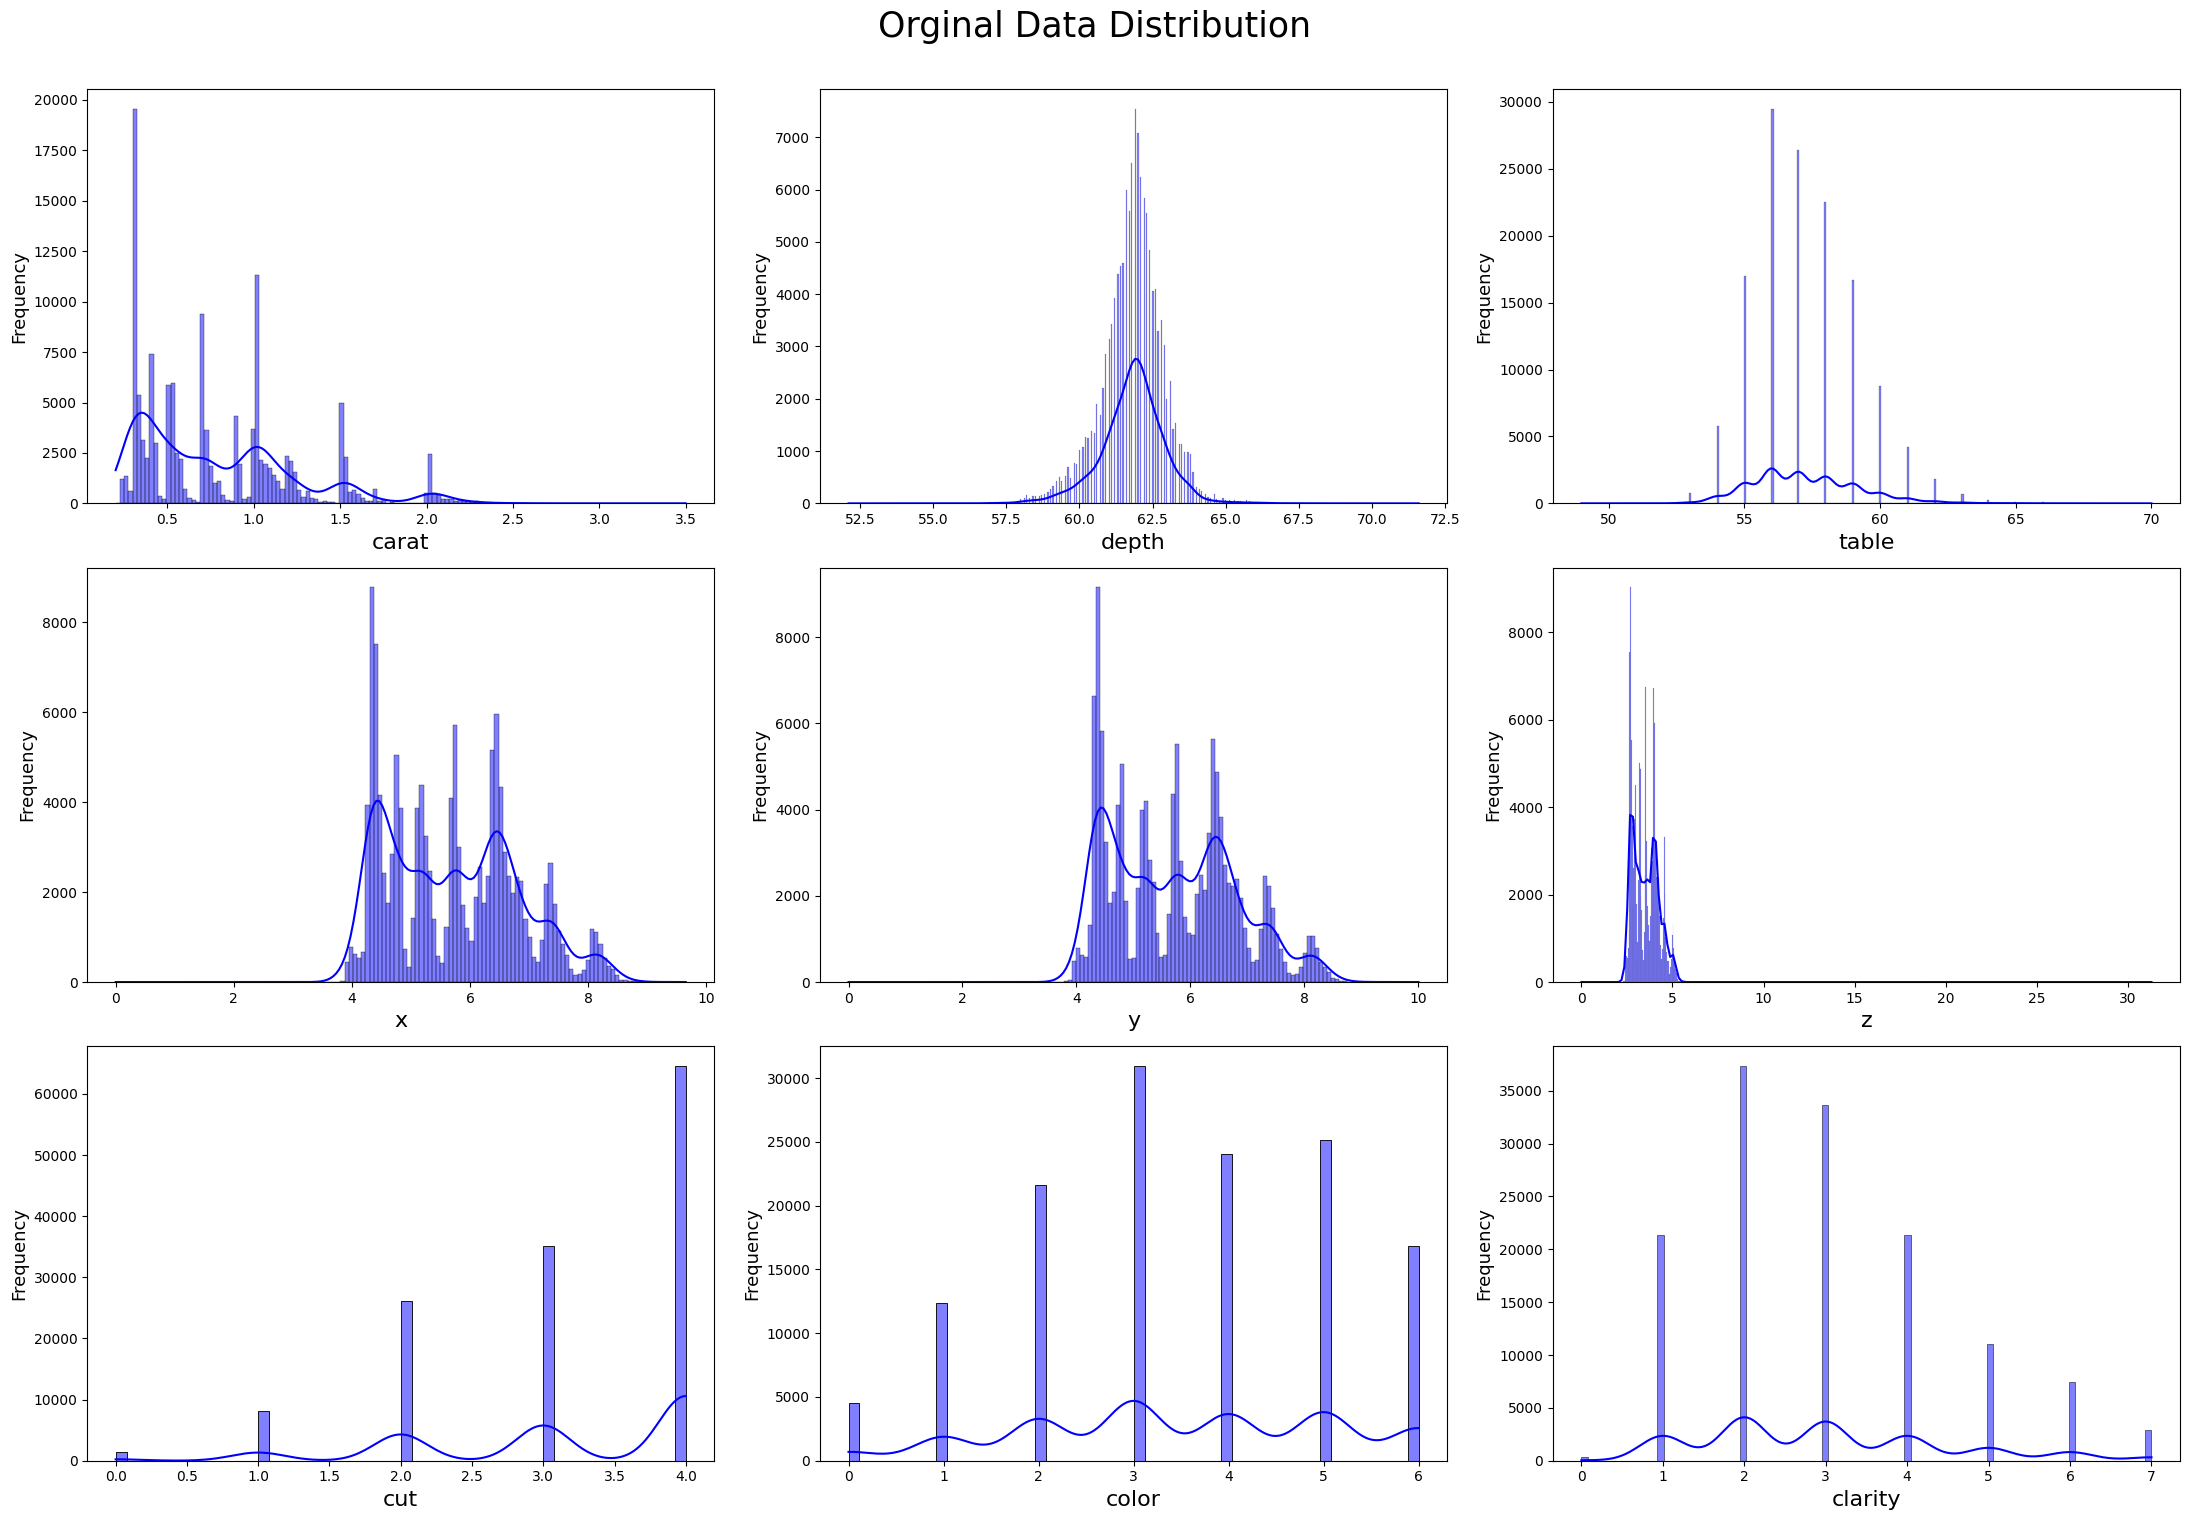

In [39]:
Original_data = X_train[['carat','depth','table','x','y','z','cut','color','clarity']]    #Rearranged because , transformed graph will be in this order only...numerical first then comes the categorical value.

fig, axs = plt.subplots(3,3, figsize=(22,15))


# Flatten the axs array to simplify indexing
axes = axs.flatten()

for i, col in enumerate(Original_data.columns):

    sns.histplot(Original_data[col], kde=True,kde_kws={'bw_adjust':2}, ax=axes[i], color='blue')
  
    # kde_kws={'bw_adjust':2}..increase in value makes the curve /kde more smooth..
    axes[i].set_xlabel(col, fontsize=16)  # Set x-axis label fontsize
    axes[i].set_ylabel('Frequency', fontsize=13)  # Set y-axis label fontsiz
    
   


    
plt.suptitle('Orginal Data Distribution',y=1.01,fontsize=25)   # (y=0.5 means i want to uplift the title lil bit..(make it non overlap with the graph) 
plt.tight_layout()
plt.show()


---------------------------------------------

*`TransFormed Training Data Distribution:`*

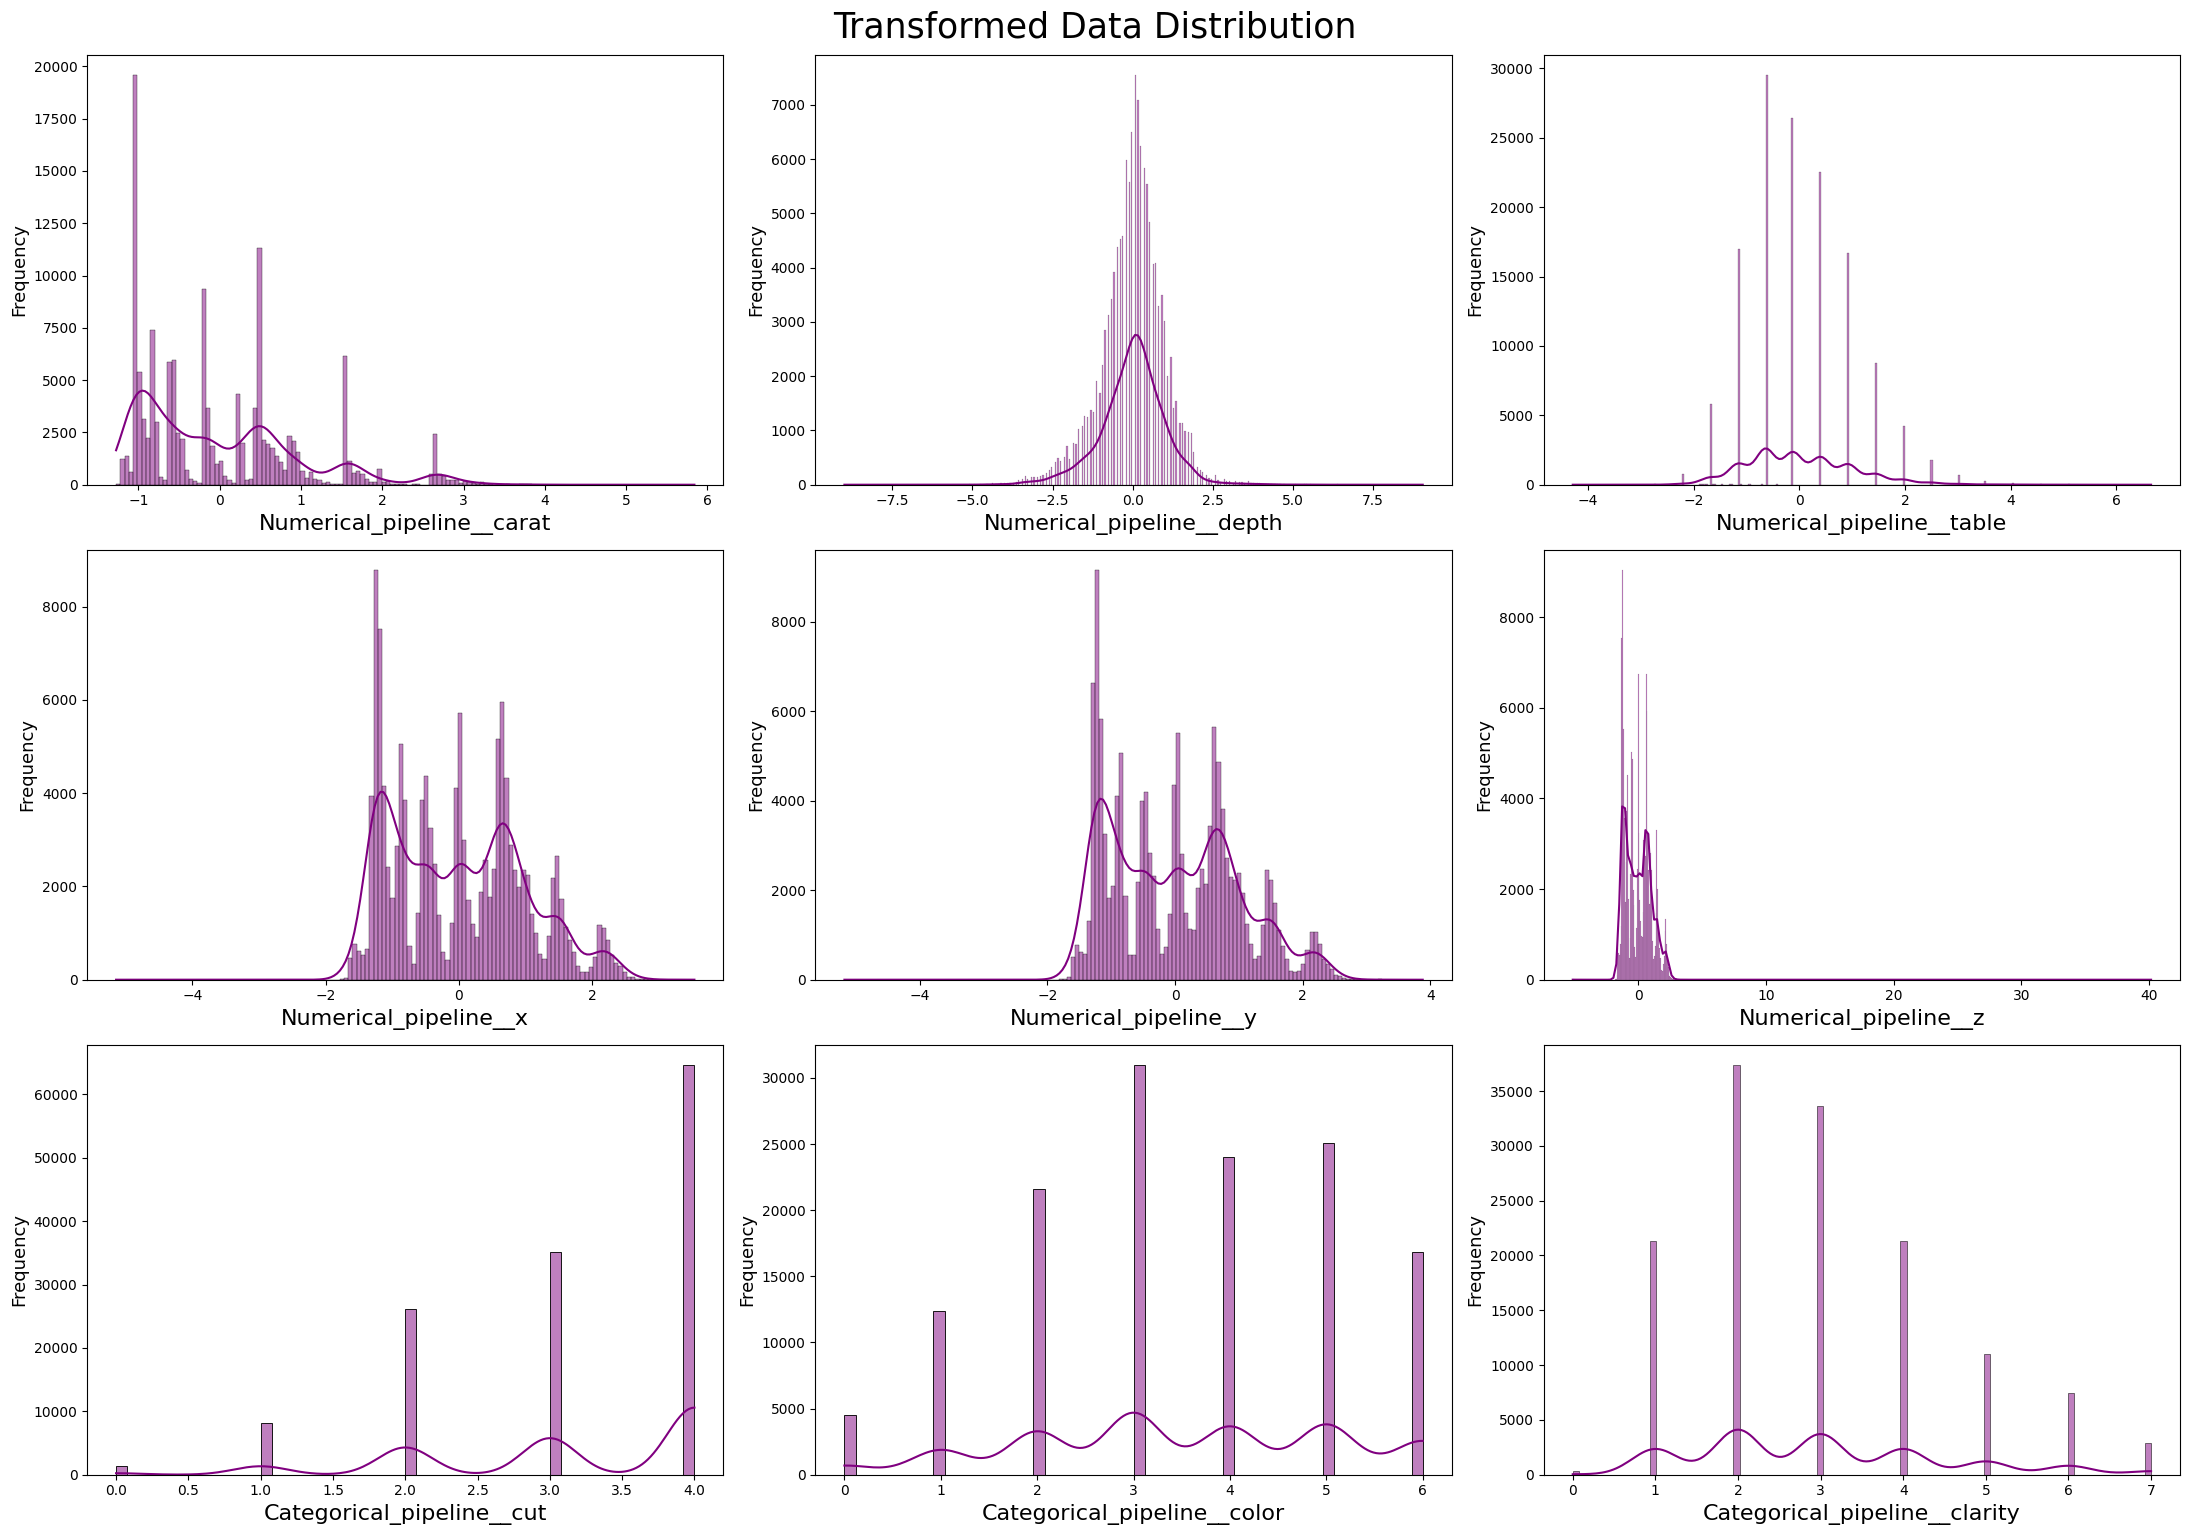

In [40]:
transformed_data = X_train_transformed 

fig, axes = plt.subplots(3,3, figsize=(22,15))


# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot distribution plots for each feature
for i, col in enumerate(transformed_data.columns):
    sns.histplot(transformed_data[col], kde=True, kde_kws={'bw_adjust':2},ax=axes[i], color='purple') 
    # kde_kws={'bw_adjust': 2} : impact the shape and smoothness of the estimated density function 
    #...increase in value makes the curve /kde more smooth..
    
    axes[i].set_xlabel(col, fontsize=16)  # Set x-axis label fontsize
    axes[i].set_ylabel('Frequency', fontsize=13)  # Set y-axis label fontsiz

# Adjust layout
plt.tight_layout()
plt.suptitle('Transformed Data Distribution',y=1.02,fontsize=25)
plt.show()

**`Observation : We can observe that before transformation the mean value and SD was different.....but after doing the transformation....using StandardScaler.....the value of mean comes to 0 and the SD = 1.`**

**`Otherwise the kde /curve will remain same....the smoothness we can change using kde_kws={'bw_adjust':2}...increase in value makes the curve /kde more smooth..`**